In [12]:
#IMPORTING MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

LOADING THE DATASET

In [24]:
data_iris=datasets.load_iris()
df=pd.DataFrame(data_iris.data,columns=data_iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


PERFORMING EDA OPERATIONS 

In [26]:
df.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [28]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

AS THERE IS NO NULL VALUES IN THE DATASET WE CAN PROCEED WITH THE CLUSTERING

K-MEANS CLUSTERS

In [10]:
x=df.iloc[:,[0,1,2,3]].values
arr=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init='k-means++',max_iter = 300, n_init =10, random_state=0)
    kmean.fit(x)
    arr.append(kmean.inertia_)

PLOTTING LINE GRAPH - ELBOW METHOD

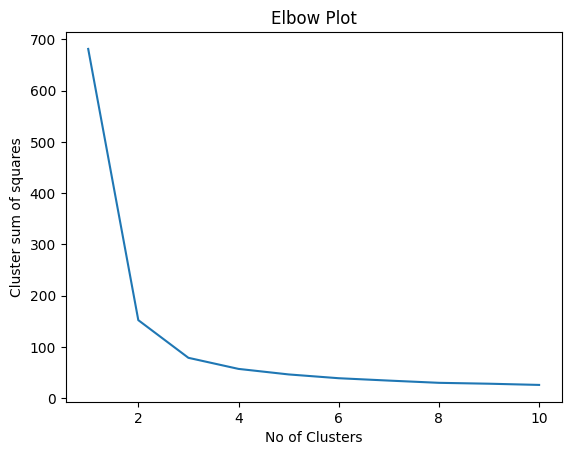

In [14]:
plt.plot(range(1,11),arr)
plt.title('Elbow Plot')
plt.xlabel("No of Clusters")
plt.ylabel('Cluster sum of squares')
plt.show()

K-MEAN CLASSIFIER ON THE DATASET

In [15]:
kmean=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_mean=kmean.fit_predict(x)

VISUALISING THE CLUSTERS AND FINDING THE CENTROIDS OF EACH CLUSTERS

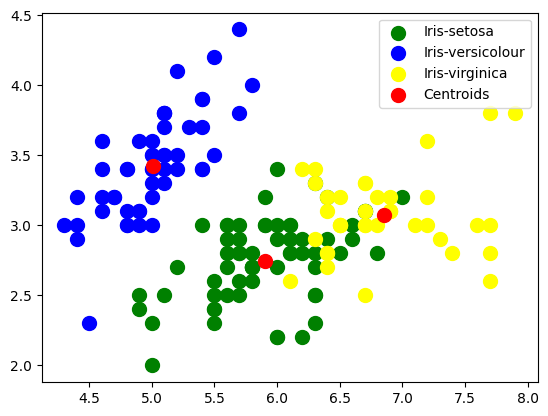

In [23]:
plt.scatter(x[y_mean == 0, 0], x[y_mean == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_mean == 1, 0], x[y_mean == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_mean == 2, 0], x[y_mean == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

# ADDING THE CENTROIDS
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()